### Unsupervised ML

In [255]:
# !pip install yellowbrick

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Assessing the data

In [257]:
data = pd.read_csv('data.csv', encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [258]:
# checking for missing values
missing_values = data.isnull().sum()

# checking for duplicated values
duplicate_rows = data.duplicated().sum()

# Convert "Invoice date" to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [259]:
# Print the summary of missing values and duplicate rows
print("\nSummary of Missing Values:")
print(missing_values)

print("\nSummary of Duplicate Rows:")
print(duplicate_rows)

# Print out the first few rows of the DataFrame to examine the changes
data.head()


Summary of Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Summary of Duplicate Rows:
5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data cleaning

In [260]:
# Drop duplicated rows
data = data.drop_duplicates()

# Drop rows with missing values
data = data.dropna()

# display the dataset duplicste or missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [261]:
# Calculate summary statistics for key variables (Quantity, Unit Price)
data_des = data[['Quantity', 'UnitPrice']].describe()
data_des.head()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000


### EDA

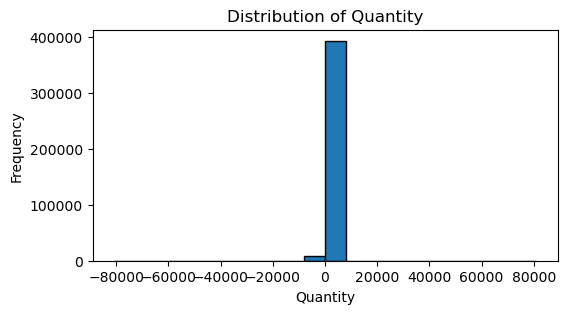

In [262]:
#  Visualize the distribution of Quantity using a histogram
plt.figure(figsize=(6, 3))
plt.hist(data['Quantity'], bins=20, edgecolor='k')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

#### Observatons:
- There are more product with less than zero quantity.
- some product are ordered in very low amount
- There are product ordered in high quantities

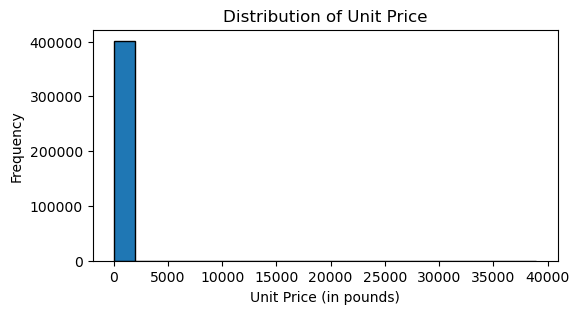

In [263]:
# Visualize the distribution of Unit Price using a histogram
plt.figure(figsize=(6, 3))
plt.hist(data['UnitPrice'], bins=20, edgecolor='k')
plt.xlabel('Unit Price (in pounds)')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.show()

#### Observation:
- There are more product with low unit price


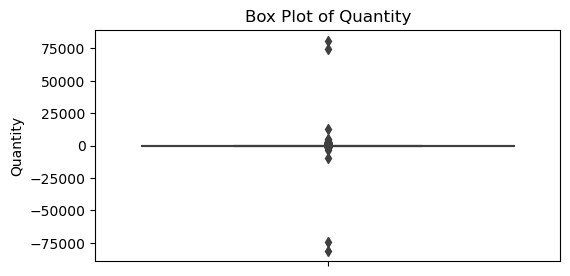

In [264]:
# Visualize the distribution of Quantity using a box plot
plt.figure(figsize=(6, 3))
sns.boxplot(y=data['Quantity'])
plt.ylabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

- There are quanity with outliers, they are either very high or very low ordered

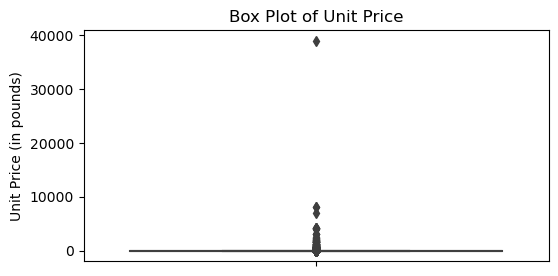

In [265]:
# Visualize the distribution of Unit Price using a box plot
plt.figure(figsize=(6, 3))
sns.boxplot(y=data['UnitPrice'])
plt.ylabel('Unit Price (in pounds)')
plt.title('Box Plot of Unit Price')
plt.show()

- There are product with extremely high price, these are outliers

In [266]:
# Temporal Analysis
# Extract the month and year from the "Invoice date" column
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

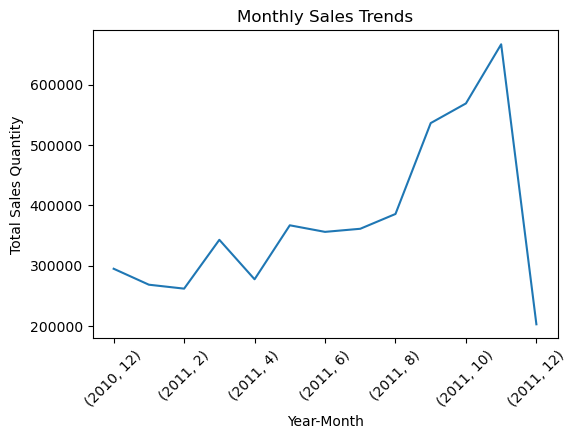

In [267]:
# Plot monthly sales trends
monthly_sales = data.groupby(['Year', 'Month'])['Quantity'].sum()
monthly_sales.plot(kind='line', figsize=(6, 4))
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.show()

-  sales have been flutuating between feb 2011 to march 2011 
- There was a major increase between April and November
- The month of Dec isnt favorable. Dec 2010/2011 had a low salas
- Usually major sales is between April and November

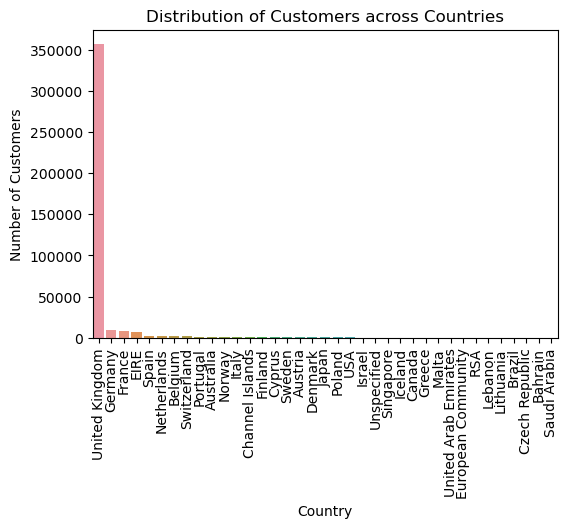

In [268]:
# Distribution of Customers across Countries
country_counts = data['Country'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers across Countries')
plt.xticks(rotation=90)
plt.show()

- Most of the customers are from the United Kingdom(majorly) followed by Germany and France and have lowest customers coming from Saudi Arabia

In [269]:
# Assuming you have a transaction-level dataset, calculate RFM metrics for each customer
rfm_df = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': 'sum'  # Monetary Value
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
})

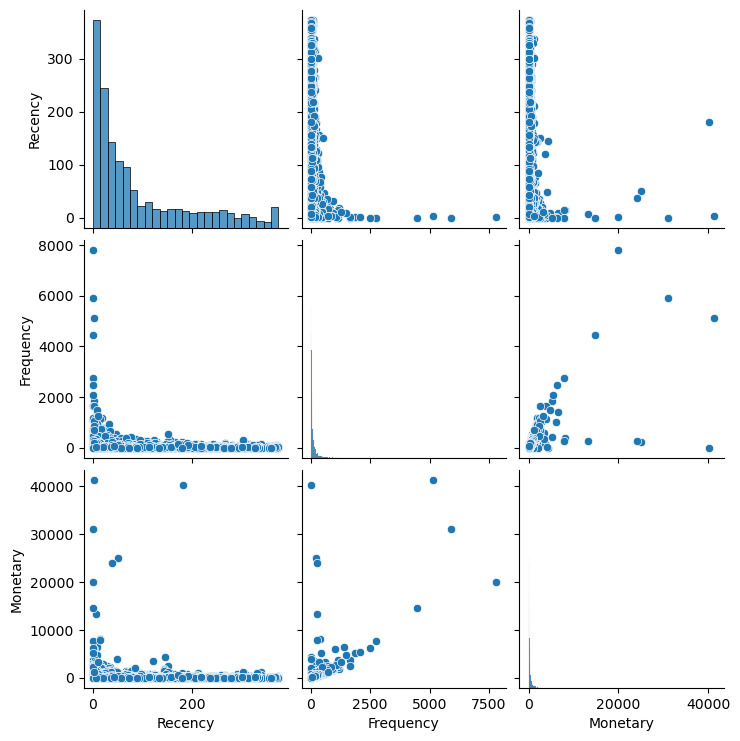

In [270]:
# visualize the distribution of RFM metrics
sns.pairplot(rfm_df)
plt.show()

- Customers have recently been making more purchase, these customers can more engaged. Few of these customers who have been recently making purchase have been loyal,i.e frequently. And of the loyal customers, few have high monetary value(i.e they spend more)

#### Customer Segmentation

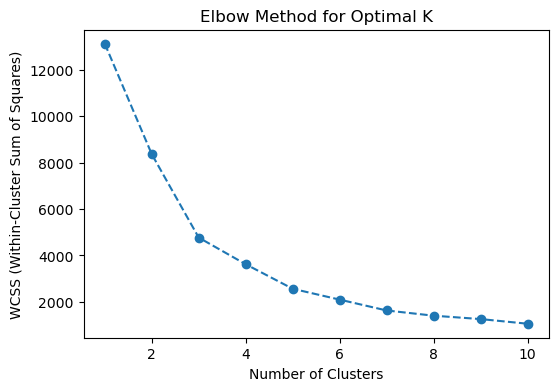

In [271]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the RFM data (mean=0, std=1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


         Mean Recency  Mean Frequency  Mean Monetary  Number of Customers
Cluster                                                                  
0          246.175182       27.255474      98.476479                 1096
1           39.142857     3400.142857   28077.950000                    7
2           39.148363      106.433466     333.656159                 3269


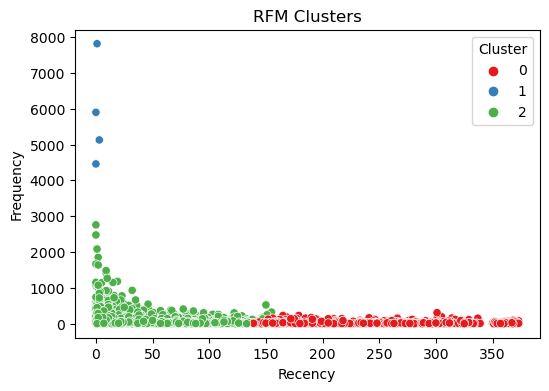

In [272]:
rfm_df = rfm_df.reset_index() # Reset the rfm_df grouping by calling reset_index()

k = 3  # Example: You can choose the "elbow point" from the plot

# Perform K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Explore the characteristics of each cluster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={
    'Recency': 'Mean Recency',
    'Frequency': 'Mean Frequency',
    'Monetary': 'Mean Monetary',
    'CustomerID': 'Number of Customers'
})

# Print the cluster summary
print(cluster_summary)

# Visualize the clusters using a scatter plot (example for 2D visualization)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Clusters')
plt.show()

#### visualization and interpretation

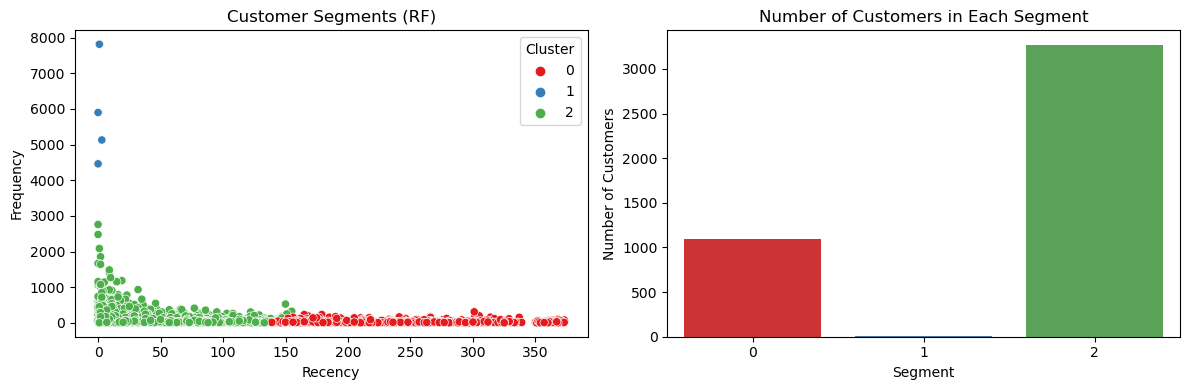

In [277]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns for two plots

# Scatter plot to visualize segments based on Recency and Frequency
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='Set1', ax=axes[0])
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Customer Segments (RF)')

# Bar chart to visualize the number of customers in each segment
sns.countplot(data=rfm_df, x='Cluster', palette='Set1', ax=axes[1])
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Number of Customers in Each Segment')

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


**Interpretation of Customer Segments**:
- **Segment 0**: These customers have relatively low recency (recently made purchases) and high frequency (frequent buyers). They represent a group of loyal and active customers.

- **Segment 1**: These customers have moderate recency and frequency. They might be regular but not highly active shoppers.

- **Segment 2**: These customers have higher recency (less recent purchases) and lower frequency. They might be less engaged or occasional buyers.

**Identifying Valuable Customer Segments:**

To identify the most valuable customer segments, consider their impact on your business objectives. In most cases, the most valuable segments are those that contribute significantly to revenue or profit. Here are some metrics to evaluate:

- **Revenue**: Analyze the total revenue generated by each segment. The segment with the highest revenue is usually valuable.

- **Average Order Value (AOV)**: Calculate the AOV for each segment. Higher AOV segments may be more valuable even if they have fewer customers.

- **Customer Lifetime Value (CLV)**: Assess the CLV for each segment. Segments with high CLV are often the most valuable over the long term.

- **Retention Rates**: Examine customer retention rates in each segment. High retention segments are valuable for ongoing business stability.
